# CONDAT ALGORITHM FOR COMPUTED TOMOGRAPHY

## Theory

Condat Algorithm aims at finding $x \in E$ minimizing:
\begin{equation}
F(x) = f(x) + g(x) + \sum_{m=1}^M h_m(L_mx)
\end{equation}

where $f$ is a differentiable function which gradient is L-Lipschitz and functions $g$ and $h_m$ have known *proximity operators* and $L_m$ are linear operators.

Choose $\rho \in ]0,1]$ (the constant inertial term as for Nesterov acceleration), and $\sigma>0$ and $\tau>0$ (the usual parameters of a primal dual algorithm) be such that:
$$\tau \left( \frac{L}{2}+\sigma ||| \sum_{m=1}^ML^*_mL_m||| \right) < 1$$

Then you just choose an initial point $x_0 \in E$ and initial dual variables $\left(u_0^m\right)_{1\leq m\leq M}$ and iterate through the algorithm:

*From the course*:

5. Partial Radon measurements inversion.

We consider here a Radon operator R where measurements are done only on a small number of angles : $y = Rx^0+b$. If we assume that the noise $b$ is gaussian and the target $x^0$ has a small TV norm, the inversion can be done minimizing

$$F(x)=\frac{1}{2} \|y-Rx\|_2^2+\lambda\|\nabla x\|_1$$

Let’s recall that $R^*$ is the back-projection associated to R (without any filtering). It is not impossible
to compute the proximity operator of $f(x) = \frac{1}{2} \|y-Rx\|_2^2$ but it’s a bit tricky. From a theoretical point of view $R^*R$ is a simple ramp filter but the interpolation step during the computations of $R$ and $R^*$. That is why I recommend to use an explicit descent on $f$. Here the PD algorithm by Condat seems to be the more efficient : explicit on $f$ and use the proximity operator of the $l_1$ norm and the computation of discrete gradient and discrete divergence.

Therefore, $f(x) = \frac{1}{2}\|y-Rx\|_2^2$ and $\nabla f(x) = R^*(y-Rx) = R^*(y)-R^*R(x)$
According to last paragraph, $R^*R$ is simple to compute, thus maybe it is simpler and more efficient to compute the second expression.
$\nabla f$ is L-Lipschitz with $L=|||R^*R|||$

There is no function g.

For $\sum_{m=1}^M h_m(L_mx)$, they are two solutions i can think of :
1. $M = dim(E) $, $h = \|\cdot\|_1$, $L = \nabla$. Thus $L^* = div(\cdot)$.
    
    Discrete gradient is simply the finite difference operator: $\nabla(x)_i = \begin{cases} x_i-x_{i-1} \text{ If } i \neq 0 \\ 0 \text{ Otherwise} \end{cases}$
    
    In the same way, discrete divergence is: $div(x)_i = \begin{cases} x_i-x_{i+1} \text{ If } i < len(x)-1 \\ x_{len(x)-1} \text{ If } i = len(x)-1 \\ -x_1 \text{ If } i = 0 \end{cases}$
    
    Because you want to find images, those gradients and divergences are computed along all $M$ axes of your data.
    

2. The other way is to compute partial gradients and $M = len(x)-1$ but it might be less efficient because it implies that our operations in the algorithm will loop over the data instead of computing the tensorized version (1.)


## Code

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
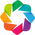

In [345]:
%matplotlib inline
from IPython.display import HTML
import matplotlib as mplt
from matplotlib import animation, rc
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import holoviews as hv
hv.extension('bokeh')
import param
import pywt
import panel as pn
from scipy import fftpack as ft
from skimage.transform import radon,iradon,rescale,rotate
imagename = 'shepplogan.png'
imagename2 = 'donald.jpg'

In [502]:
##### TOOLS #####

def to255(imrec):
    return np.round((imrec-np.min(imrec))/np.ptp(imrec)*255)
    
def to_square(image):
    M,N = image.shape
    P = max(M,N)
    res = np.zeros((P,P))
    if M==N: 
        print("Already square")
        res = np.copy(image)
    else:
        res[int(P/2-M/2):int(P/2+M/2),int(P/2-N/2):int(P/2+N/2)]=image
    return res

def PSNR(I,Iref):
    temp=I.ravel()/np.linalg.norm(I)
    tempref=Iref.ravel()/np.linalg.norm(Iref)
    NbP=I.size
    EQM=np.sum((temp-tempref)**2)/NbP
    b=np.max(np.abs(tempref))**2
    return 10*np.log10(b/EQM)

def mse(imageA, imageB):
    imgA=imageA.astype("float")
    imgB = imageB.astype("float")
    err = np.sum((imgA - imgB)** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

Already square


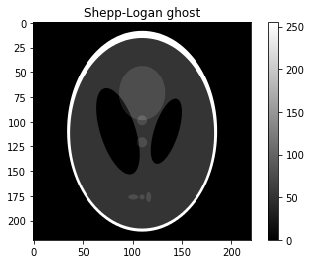

In [503]:
image = Image.open(imagename).convert('L')
image2 = image.rotate(45)
n0,n1=image.size
img = np.array(image).astype('float64')
## to grayscale if RGB
if len(img.shape)==3:
    img = np.copy((img[:,:,0]+img[:,:,1]+img[:,:,2])/3)
dim1 = img.shape[0]
dim2 = img.shape[1]
img = np.resize(img,(dim1,dim2))
img = to_square(img)
plt.imshow(img,cmap='gray')
plt.title("Shepp-Logan ghost")
plt.colorbar()
plt.show()

In [547]:
mask = np.clip(img,0,1)
mask[50:160,60:160]=1

## Radon operators

In [374]:
## Radon transform: from image to sinogram
def R(image,N=100):
    theta = np.linspace(0,180,N)
    return radon(image,theta,circle=False)

## Adjoint of Radon transform: from sinogram to image using backpropagation (unfiltered or not)
def R_star(sin,filt=None,inter='cubic'):
    T,A = sin.shape
    theta = np.linspace(0,180,A)
    return iradon(sin,theta,filter=filt,interpolation=inter,circle=False)

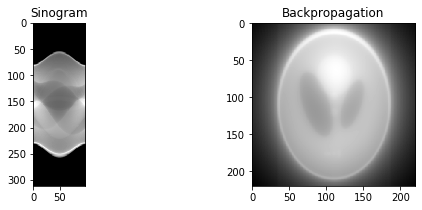

In [375]:
fig, axs = plt.subplots(1, 2, figsize=(9, 3))
axs[0].imshow(R(img),cmap='gray')
axs[0].set_title('Sinogram')
axs[1].imshow(R_star(R(img)),cmap='gray')
axs[1].set_title('Backpropagation')
plt.show()

## Definitions (gradient, cost function..)

In [376]:
#taken from PoissonEditing TP
def GradientHor(x):
    y=x-np.roll(x,1,axis=1)
    y[:,0]=0
    return y
def GradientVer(x):
    y=x-np.roll(x,1,axis=0)
    y[0,:]=0
    return y
def DivHor(x):
    N=len(x[0])
    y=x-np.roll(x,-1,axis=1)
    y[:,0]=-x[:,1]
    y[:,N-1]=x[:,N-1]
    return y
def DivVer(x):
    N=len(x)
    y=x-np.roll(x,-1,axis=0)
    y[0,:]=-x[1,:]
    y[N-1,:]=x[N-1,:]
    return y
def Gradient(x):
    y=[]
    y.append(GradientHor(x))
    y.append(GradientVer(x))
    return np.array(y)
def Div(y):
    x=DivHor(y[0,:])+DivVer(y[1,:])
    return x

In [453]:
# define F (function to be minimized)
def F(y,x,lam,N=100):
    return np.sum((y-R(x,N))**2)/2+lam*np.sum(np.abs(Gradient(x)))

# define grad of f
def grad_f(y,x,N=100):
    return R_star(R(x,N)-y) #you can choose one of the 2 expressions, depending on what is easier and more efficient to implement
    #return R_star(y)-R_star_R(x) #R_star_R(x) stands for R_star(R(x))

# define sum of L* of u
def sum_L_m_star(u):
    return Div(u)

# define l_m(x):
def L_m(x):
    return Gradient(x)
    
#define prox of sigma.h*
def prox_h_star(sigma,u):
    #from Moreau's identity: prox sigma h* = Id - prox sigma h
    return u-np.sign(u)*np.maximum(0,np.abs(u)-sigma)

## Condat algorithm

In [462]:
def Condat(y,lam,rho,tau,sigma,x0,u0,N=100,maxit=10,tol=0.01):
    x = np.copy(x0) #initial point
    u = np.copy(u0) #initial dual variables
    fun = [F(y,x,lam,N)]
    conv=[]
    for k in range(maxit):
        print("iter #",k)
        tilde_x = np.copy(x-tau*grad_f(y,x,N)-tau*sum_L_m_star(u))
        x_plus_un = np.copy(rho*tilde_x +(1-rho)*x)
        tilde_u = np.copy(prox_h_star(lam*sigma,u+sigma*L_m(2*tilde_x-x)))
        u_plus_un = np.copy(rho*tilde_u+(1-rho)*u)
        print(np.linalg.norm(img-x_plus_un)/np.linalg.norm(img))
        if k==0: 
            err=np.linalg.norm(x_plus_un-x)
        else:
            err=np.linalg.norm(x_plus_un-x)/conv[0]
            print("err : ",err)
        conv.append(err)    
        x = np.copy(x_plus_un)
        u = np.copy(u_plus_un)
        fun.append(F(y,x,lam,N))
        print("F   : ",fun[-1],"\n")
        if err<=tol:
            break
        
    return x,fun,np.array(conv[1:])

## Computation

In [463]:
#precise x0, y, and find constants L and sup_Lm
N = 20                           # number of projections
y = R(img,N)                     # objective sinogram
imgb = R_star(y)                 # backpropagation 
imgfb = R_star(y,'ramp')         # filtered backpropagation
x0 = imgb                        # initialisation 

In [540]:
lam = 0.0001
rho = 0.5
sigma = 100
maxit=100
tol=0.001
L = 1.        #Lipschitz constant of grad f (L = |||R*R|||)
sup_Lm = 10.  #operator norm constant of div(grad) ( = |||sum Lm*Lm|||, it should be less than 10)
tau = 0.99/(L/2+sigma*sup_Lm)
print("Lambda, sigma, tau : ", lam,sigma,tau)
imgc,fun,conv = Condat(y,lam,rho,tau,sigma,x0,Gradient(x0),N=N,maxit=maxit,tol=tol)

Lambda, sigma, tau :  0.0001 100 0.0009895052473763118
iter # 0
157.03512535275493
F   :  9464735046207712.0 

iter # 1
131.83981437836204
err :  0.834938433869809
F   :  6612227955775780.0 

iter # 2
110.88775557252839
err :  0.6971802083807698
F   :  4623259409730468.0 

iter # 3
93.48474248478357
err :  0.5822140244783947
F   :  3236091177509100.5 

iter # 4
79.05125606992057
err :  0.4862744565379146
F   :  2268347052334877.0 

iter # 5
67.10313664011501
err :  0.4062186718837304
F   :  1592946511224962.8 

iter # 6
57.23531840593189
err :  0.3394235299829468
F   :  1121336734121973.8 

iter # 7
49.108124744115585
err :  0.28369969032713577
F   :  791809645571633.6 

iter # 8
42.43574177594164
err :  0.23721991544082385
F   :  561361876053605.7 

iter # 9
36.97660214279137
err :  0.19845922021004225
F   :  400023208171605.94 

iter # 10
32.52550772488422
err :  0.1661449062650846
F   :  286904911913788.4 

iter # 11
28.90737541266616
err :  0.13921484328848896
F   :  20744639587537

3.919042027181439
err :  0.0015608786355774144
F   :  370225510418.5944 

iter # 99
3.879292536865722
err :  0.0015312351578130351
F   :  359900771105.48236 



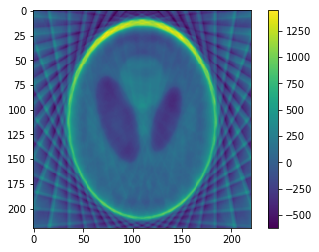

In [541]:
plt.imshow(imgc)
plt.colorbar()

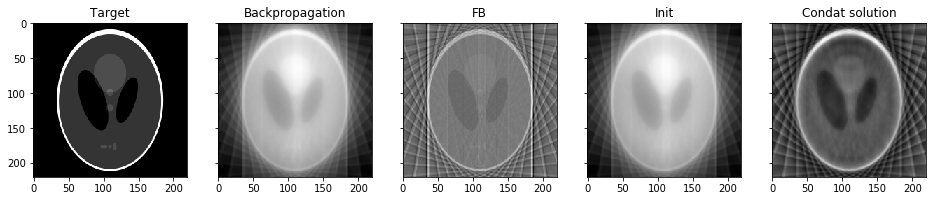

In [542]:
fig, axs = plt.subplots(1, 5, figsize=(16, 3), sharey=True)
axs[0].imshow(img,cmap='gray')
axs[0].set_title('Target')
axs[1].imshow(imgb,cmap='gray')
axs[1].set_title('Backpropagation')
axs[2].imshow(imgfb,cmap='gray')
axs[2].set_title('FB')
axs[3].imshow(x0,cmap='gray')
axs[3].set_title('Init')
axs[4].imshow(imgc,cmap='gray')
axs[4].set_title('Condat solution')
plt.show()

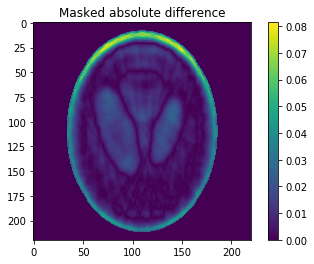

In [543]:
dif2 = (np.abs(imgc-img)/np.linalg.norm(img,1))
plt.imshow(mask*dif2)
plt.title('Masked absolute difference')
plt.colorbar()
plt.show()

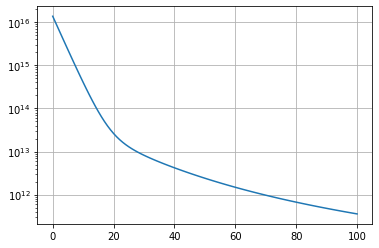

In [549]:
plt.plot(fun)
plt.yscale('log')
plt.grid()

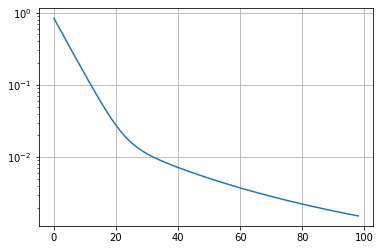

In [545]:
plt.plot(conv)
plt.yscale('log')
plt.grid()

In [546]:
print("PSNR backpropagation          : ", PSNR(mask*imgb,mask*img))
print("PSNR filtered backpropagation : ", PSNR(mask*imgfb,mask*img))
print("PSNR variational method       : ", PSNR(mask*imgc,mask*img),'\n')
print("MSE backpropagation          : ", mse(mask*imgb,mask*img))
print("MSE filtered backpropagation : ", mse(mask*imgfb,mask*img))
print("MSE variational method       : ",mse(mask*imgc,mask*img))

PSNR backpropagation          :  15.175414719863822
PSNR filtered backpropagation :  24.952214879556283
PSNR variational method       :  17.888680982919183 

MSE backpropagation          :  98635649.94659606
MSE filtered backpropagation :  214.13177383739347
MSE variational method       :  36543.59579784319
